## --> Dataset information
Load dataset_DT.csv<br>
The data is ordered by date (day, month)<br>
### Features:
* age           --> age
* job           --> type of Job
* marital       --> marital status
* education     --> highest education finished  
* default       --> already has credit in default?
* balance       --> account balance
* housing       --> taken housing loan?
* loan          --> taken personal loan?
* contact       --> communication via...
* day           --> day of last contact  
* month         --> month of last contact
* duration      --> duration of last contact
* campaign      --> number of contacts made to the client during the campaign
* pdays         --> number of days that passed by after the client was last contacted from a previous campaign (999 means client wasn't previously contacted)
* previous      --> number of contacts performed before this campaign and for this client
* poutcome      --> outcome of the previous marketing campaign
### Target variable:
* y --> has the client subscribed a term deposit?


In [ ]:
import pandas as pd                                 #Importing the pandas library
import numpy as np                                  #Importing numpy library for handling nan
file_path = "/content/sample_data/dataset_DT.csv"   #Uploaded the .csv file to drive and storing the file path
df = pd.read_csv(file_path)                         #Loading the data in a dataframe df using the read_csv file by passing the file path


# Data preprocessing

In [ ]:
import pandas as pd                                 #Importing the pandas library
import numpy as np                                  #Importing numpy library for handling nan
from sklearn.impute import SimpleImputer            #Importing SimpleImputer to impute missing values
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pointbiserialr
from scipy import stats
import datetime
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder      #Importing label encoder for mapping categorical data to encoding
file_path = "/content/sample_data/dataset_DT.csv"   #Uploaded the .csv file to drive and storing the file path
df = pd.read_csv(file_path)                         #Loading the data in a dataframe df using the read_csv file by passing the file path

# Handling unknown value/missing values


df.replace("unknown", np.nan, inplace=True)        #Treating "unknown" as a missing value by replacing with Nan

print(df.isna().sum())                             #Checking nan count post replacement

# IMPUTATION - Retention of information through substitution of missing values with mode

imputer = SimpleImputer(strategy='most_frequent')
df['education'] = imputer.fit_transform(df[['education']])
df['job'] = imputer.fit_transform(df[['job']])

# Imputing missing rows of month and day with the value that is one row before it. Reason: Dates and month within a range have the same value for this column

df['day'].fillna(method='ffill', inplace=True)
df['month'].fillna(method='ffill', inplace=True)


print(df.isna().sum())                            #Checking nan count after imputation

#Dropping columns

#1. Contact column - Calculating the percentage of 'cellular' in the column

cellular_count = (df['contact'] == 'cellular').sum()

# Calculate the total number of rows in the DataFrame
total_count = len(df)

# Calculate the percentage
percentage_cellular = (cellular_count / total_count) * 100

print("Cellular forms", percentage_cellular, " of the dataset")

df.drop(['contact'], axis = 1, inplace=True)    #Dropping the column since 'cellular' is 70% of the column and hence is redundant info

#2. poutcome column
df.drop(['poutcome'], axis = 1, inplace=True)   #poutcome has 72% of missing values and hence is redundant info

#3. Default column

default_count = (df['default'] == 'no').sum()

# Calculate the total number of rows in the DataFrame
total_count = len(df)

# Calculate the percentage
percentage_cellular = (default_count / total_count) * 100

print("'No' forms", percentage_cellular, " of the dataset for default column")

df.drop(['default'], axis = 1, inplace=True)    #Dropping the column since 'no' is 99% of the column and hence is redundant info

# Convert continuous features to categorical if needed (e.g., age groups)
df['age_group'] = pd.cut(df['age'], bins=[0, 14, 24, 64, 100], labels=['<14', '15-24', '25-64', '65+'])
first_column = df.pop('age_group')
df.insert(0, 'age_group', first_column)
df.drop(columns=['age'], inplace=True)

def has_loan(df):
    if df['housing'] == "no" and df['loan'] == "no":
        return False
    return True

df["has_loan"] = df.apply(has_loan,axis=1)
df.drop(columns=['housing','loan'],inplace=True)

df.describe().T



age              0
job            112
marital          0
education     1073
default          0
balance          0
housing          0
loan             0
contact       4313
day            306
month          314
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64
age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact       4313
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     13259
y                0
dtype: int64
Cellular forms 70.53682896379524  of the dataset
'No' forms 98.94696846333387  of the dataset for default column


count         mean          std     min    25%    50%     75%  \
balance   18423.0  1849.616403  3742.556247 -3372.0  206.0  718.0  2116.5   
day       18423.0    15.251642     8.090297     1.0    8.0   15.0    21.0   
duration  18423.0   411.779569   323.241660     5.0  192.0  316.0   533.0   
campaign  18423.0     2.279433     1.981642     1.0    1.0    2.0     3.0   
pdays     18423.0    57.421213   112.455326    -1.0   -1.0   -1.0    91.0   
previous  18423.0     0.875970     2.226526     0.0    0.0    0.0     1.0   

               max  
balance   102127.0  
day           31.0  
duration    3881.0  
campaign      55.0  
pdays        871.0  
previous      58.0


*   On an average, as per the current campaign, clients are contacted an average of 2 times and the maximum possible is 55 times
*   Average call duration between the client and bank is around 400 seconds



# Visualisation

1. Count plot of marital status against target
2. Count plot of job against target

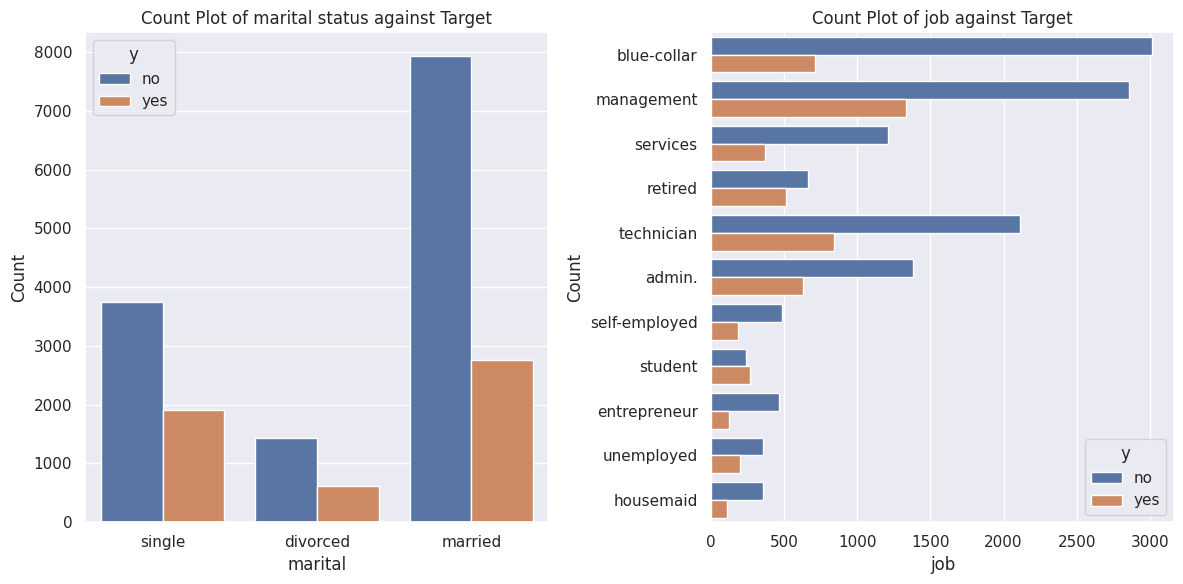

<ipython-input-192-b3e278f1ef7b>:28: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.0)


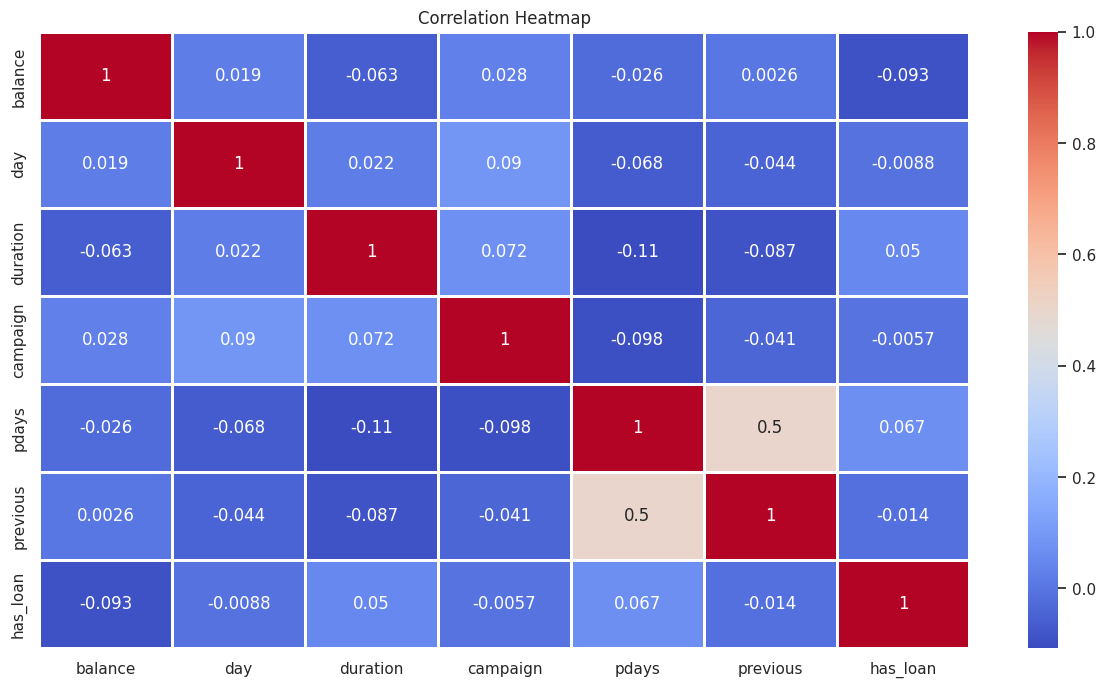

In [ ]:

# Visualisation - Count plot


sns.set(style="darkgrid")

# Create a count plot for marital status against the Target variable
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="marital", hue="y", data=df)
plt.xlabel("marital")
plt.ylabel("Count")
plt.title("Count Plot of marital status against Target")

# Create a count plot for job against the Target variable
plt.subplot(1, 2, 2)
sns.countplot(y="job", hue="y", data=df, orient = 'x')
plt.xlabel("job")
plt.ylabel("Count")
plt.title("Count Plot of job against Target")

# Show the plots
plt.tight_layout()
plt.show()

#Correlation

plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1.0)
plt.title('Correlation Heatmap')
plt.show()

Analysis:



*   We can understand that majority of the people who are married have not subscribed to a term deposit
*   It is obeserved that divorced clients have the least term deposit subscriptions

* With regards to the relation that job has on subscription, it is observed that clients who have a blue-collared job are the maximum who don't have a term deposit

* Majority of the clients who are a part of the management industry hold a term deposit subscription

* Here, pdays and previous and positively correlated to a high level and hence one of the columns can be dropped. Hence dropping column 'previous' as its redundant information








In [ ]:
df.drop(['previous'], axis = 1, inplace=True)

2. Box plot of duration of the calls and their occurence

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
<ipython-input-194-a51ae7734a97>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'], ax = ax2)


Max duration  call in minutes:   64.7
Min duration  call in minutes:    0.1
Mean duration call in minutes:    6.9
STD duration  call in minutes:    5.4
1º Quartile:  192.0
2º Quartile:  316.0
3º Quartile:  533.0
4º Quartile:  3881.0
Duration calls above:  1044.5 are outliers
Numerber of outliers:  3179
Number of clients:  18423
Outliers are: 17.26 %


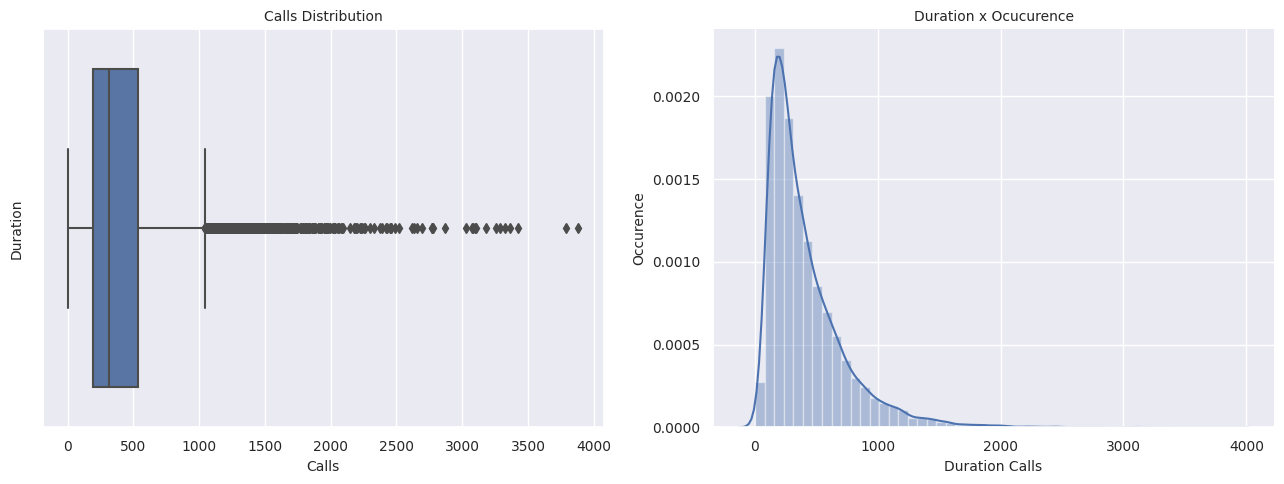

In [ ]:
#   Visualisation - Box plot

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df, orient = 'v', ax = ax1)
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['duration'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Duration Calls', fontsize=10)
ax2.set_ylabel('Occurence', fontsize=10)
ax2.set_title('Duration x Ocucurence', fontsize=10)
ax2.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

print("Max duration  call in minutes:  ", round((df['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((df['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((df['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((df['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

# Quartiles
print('1º Quartile: ', df['duration'].quantile(q = 0.25))
print('2º Quartile: ', df['duration'].quantile(q = 0.50))
print('3º Quartile: ', df['duration'].quantile(q = 0.75))
print('4º Quartile: ', df['duration'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Duration calls above: ', df['duration'].quantile(q = 0.75) + 1.5*(df['duration'].quantile(q = 0.75) - df['duration'].quantile(q = 0.25)), 'are outliers')

print('Numerber of outliers: ', df[df['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['duration'] > 644.5]['duration'].count()*100/len(df),2), '%')

Analysis:



*   The mean number of calls received for a duration is around 400 seconds
*   The call duration is around 300 seconds for most of the calls.



# **Conversion of continous to categorical features**

1. pdays
2. duration
3. campaign
4. month

In [ ]:
# 1. Pdays

def numeric_to_categorical(value):
    if value == -1:
        return "never"
    elif isinstance(value, (int, float)):
        return f"{int(value//7)} weeks"
    else:
        return "Invalid"

# Apply the function to the 'pdays' column
df['pdays'] = df['pdays'].apply(numeric_to_categorical)


# 2. Duration

df['duration'] = pd.qcut(df['duration'],q=[0, .33, .66,1],labels=['Short','Medium', 'Long'])


# 3. Campaign


quantiles = 4
labels = ['Rare', 'Occasional', 'Frequent']
df['campaign'] = pd.qcut(df['campaign'], quantiles, labels=labels, duplicates='drop')

# 4. Month
def month_change(df):
    month_to_int = {
        "jan": 1,
        "feb": 2,
        "mar": 3,
        "apr": 4,
        "may": 5,
        "jun": 6,
        "jul": 7,
        "aug": 8,
        "sep": 9,
        "oct": 10,
        "nov": 11,
        "dec": 12
    }
    return month_to_int[df['month']]
df['month'] = df.apply(month_change,axis=1)
def week_of_year(data):
    date_obj = datetime.datetime(year=2022, month=int(data['month']), day=int(data['day']))
    return date_obj.strftime("%U")
df['week'] = df.apply(week_of_year,axis=1)
df.drop(columns=['day','month'],inplace=True)

df

age_group           job   marital  education  balance duration  \
0         25-64   blue-collar    single  secondary  13408.0     Long   
1         25-64    management  divorced   tertiary  20727.0   Medium   
2         25-64      services    single   tertiary   1743.0     Long   
3         25-64    management  divorced   tertiary  10469.0    Short   
4         25-64    management    single   tertiary   7628.0   Medium   
...         ...           ...       ...        ...      ...      ...   
18418     25-64    technician   married  secondary   2152.0    Short   
18419     25-64    management   married  secondary      0.0     Long   
18420     25-64   blue-collar   married  secondary   1451.0    Short   
18421     25-64    technician    single  secondary   1711.0   Medium   
18422       65+  entrepreneur   married  secondary      0.0     Long   

         campaign     pdays    y  has_loan week  
0            Rare     never   no     False   13  
1      Occasional  18 weeks   no     False   13  
2            Rare  37 weeks   no      True   13  
3            Rare     never   no      True   13  
4            Rare     never   no     False   13  
...           ...       ...  ...       ...  ...  
18418        Rare  17 weeks   no     False   39  
18419        Rare     never   no     False   39  
18420        Rare  17 weeks  yes     False   39  
18421        Rare     never  yes     False   39  
18422        Rare     never  yes     False   39  

[18423 rows x 11 columns]

# Point biserial correlation for continous values


- ***The point-biserial*** correlation is used to measure the relationship between a binary target variable and a continuous or dichotomous (categorical) feature.
 - In our case I will be using this to determine the correlation between continous feature and target variable


In [ ]:
encoder = LabelEncoder()

correlation, p_value = stats.pointbiserialr(encoder.fit_transform(df['y']), df['balance'])
print(f"Point Biserial Correlation: {correlation}, p-value: {p_value}")


Point Biserial Correlation: -0.007689437091707218, p-value: 0.29665091218206513


Dropping 'balance' because of very less correlation with target. Though balance is critical, due to the presence of outliers, the correlation turns out to be very minimal, indicating that balance is an insignificant feature in this dataset

In [ ]:
df.drop(['balance'], axis = 1, inplace=True)
df

age_group           job   marital  education duration    campaign  \
0         25-64   blue-collar    single  secondary     Long        Rare   
1         25-64    management  divorced   tertiary   Medium  Occasional   
2         25-64      services    single   tertiary     Long        Rare   
3         25-64    management  divorced   tertiary    Short        Rare   
4         25-64    management    single   tertiary   Medium        Rare   
...         ...           ...       ...        ...      ...         ...   
18418     25-64    technician   married  secondary    Short        Rare   
18419     25-64    management   married  secondary     Long        Rare   
18420     25-64   blue-collar   married  secondary    Short        Rare   
18421     25-64    technician    single  secondary   Medium        Rare   
18422       65+  entrepreneur   married  secondary     Long        Rare   

          pdays    y  has_loan week  
0         never   no     False   13  
1      18 weeks   no     False   13  
2      37 weeks   no      True   13  
3         never   no      True   13  
4         never   no     False   13  
...         ...  ...       ...  ...  
18418  17 weeks   no     False   39  
18419     never   no     False   39  
18420  17 weeks  yes     False   39  
18421     never  yes     False   39  
18422     never  yes     False   39  

[18423 rows x 10 columns]

# **Encoding**



*   In order to model a Decision tree, it is always recommended to deal with categorical data
 - A standard approach is to encode the categorical data using numeric coding



In [ ]:

#ENCODING DATASET
label_encoder = LabelEncoder()
for column in  df.columns:
    if column != "day":
        df[column] = label_encoder.fit_transform(df[column])



## **DECISION TREE**

STEPS:

1. Build model with all 12 features
2. Use Decision tree's inbuilt feature importance parameter to identify the top 6 important features of the dataset
3. Determine the different metrics such as accuracy and precision for the decision tree
4. Redo the decision tree with the 6 features

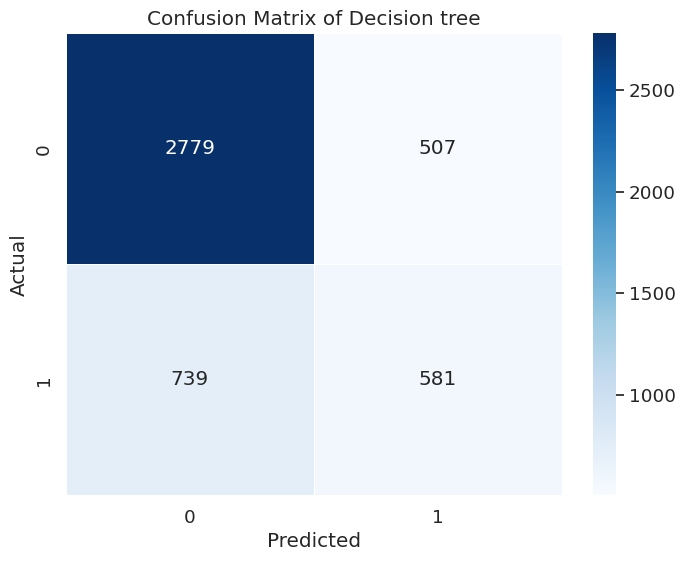

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3286
           1       0.53      0.44      0.48      1320

    accuracy                           0.73      4606
   macro avg       0.66      0.64      0.65      4606
weighted avg       0.72      0.73      0.72      4606

     Feature  Importance
8       week    0.322039
1        job    0.164399
6      pdays    0.134740
4   duration    0.106774
3  education    0.066718
5   campaign    0.061714
7   has_loan    0.058540
2    marital    0.052778
0  age_group    0.032297


In [ ]:

#decision tree
X = df.drop(columns=['y'])
Y = df['y']
x_train,x_val,y_train,y_val = train_test_split(X,Y,test_size=0.25,random_state=540)

decision_tree = DecisionTreeClassifier(random_state=40)
decision_tree.fit(x_train,y_train)
decision_tree.predict(x_val)

conf_matrix = confusion_matrix(y_val, decision_tree.predict(x_val))
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Decision tree')
plt.show()

class_report = classification_report(y_val, decision_tree.predict(x_val))
print(class_report)

#Determining the feature importance

feature_importances = decision_tree.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance value in descending order
print(feature_importance_df.sort_values(by='Importance', ascending=False))




In [ ]:
export_graphviz(decision_tree, out_file="decision_tree.dot", class_names=["no", "yes"],
                feature_names=x_train.columns, impurity=False, filled=True)
with open("./decision_tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

The 6 most important features are:

1. week
2. job
3. pdays
4. duration
5. education
6. campaign

Performing decision tree using gini impurity and entropy as criterion using these 6 features

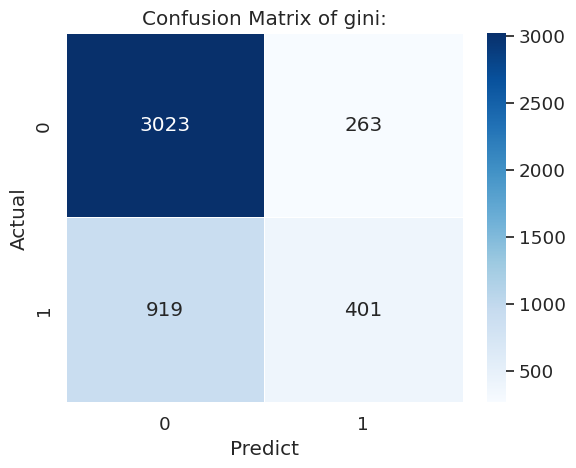

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      3286
           1       0.60      0.30      0.40      1320

    accuracy                           0.74      4606
   macro avg       0.69      0.61      0.62      4606
weighted avg       0.72      0.74      0.71      4606



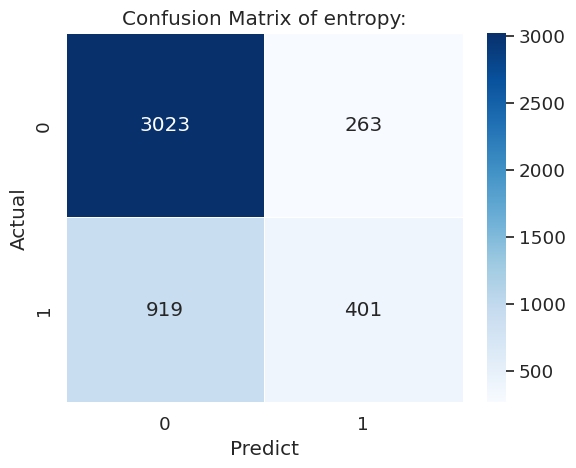

              precision    recall  f1-score   support

           0       0.77      0.92      0.84      3286
           1       0.60      0.30      0.40      1320

    accuracy                           0.74      4606
   macro avg       0.69      0.61      0.62      4606
weighted avg       0.72      0.74      0.71      4606



In [ ]:
decision_tree_gini = DecisionTreeClassifier(criterion="gini", max_depth=5, min_samples_leaf=11, random_state=40)
decision_tree_gini.fit(x_train[['week','job','pdays','duration','education','campaign']],y_train)
decision_tree_gini.predict(x_val[['week','job','pdays','duration','education','campaign']])

sns.heatmap(confusion_matrix(y_val,decision_tree_gini.predict(x_val[['week','job','pdays','duration','education','campaign']])),  annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title("Confusion Matrix of gini:")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_val, decision_tree_gini.predict(x_val[['week','job','pdays','duration','education','campaign']])))


#ENTROPY

decision_tree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_leaf=11, random_state=40)
decision_tree_entropy.fit(x_train[['week','job','pdays','duration','education','campaign']],y_train)
decision_tree_entropy.predict(x_val[['week','job','pdays','duration','education','campaign']])

sns.heatmap(confusion_matrix(y_val,decision_tree_entropy.predict(x_val[['week','job','pdays','duration','education','campaign']])), annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title("Confusion Matrix of entropy:")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_val, decision_tree_entropy.predict(x_val[['week','job','pdays','duration','education','campaign']])))



# **DECISION TREE VISUALISATION**

1.   Gini impurity


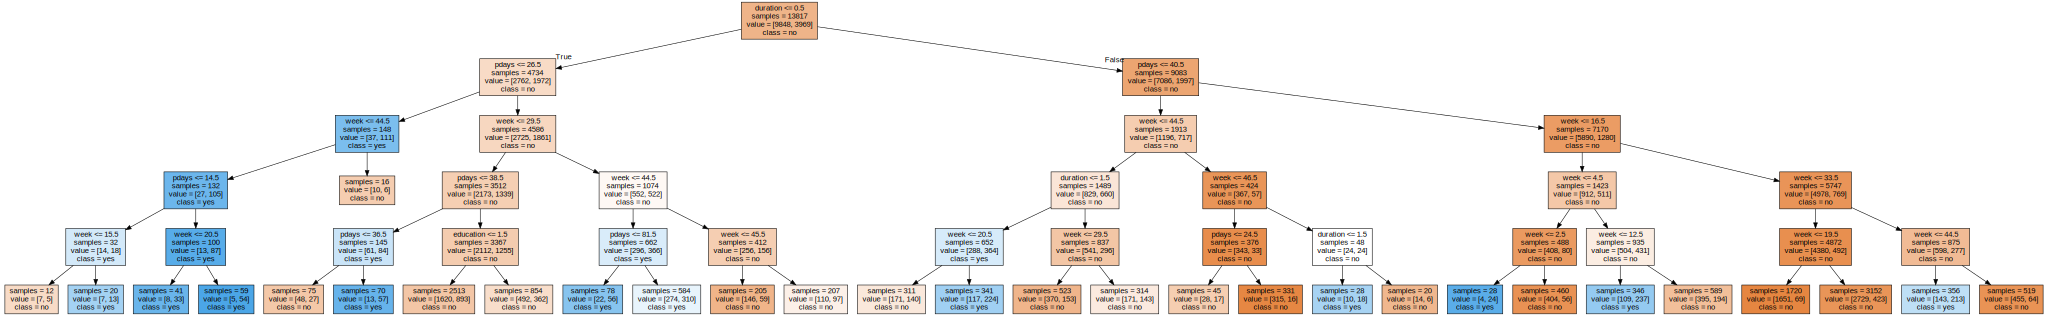

In [ ]:
export_graphviz(decision_tree_gini, out_file="decision_tree_gini.dot", class_names=["no", "yes"],
                feature_names=['week','job','pdays','duration','education','campaign'], impurity=False, filled=True)
with open("./decision_tree_gini.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

2. Entropy

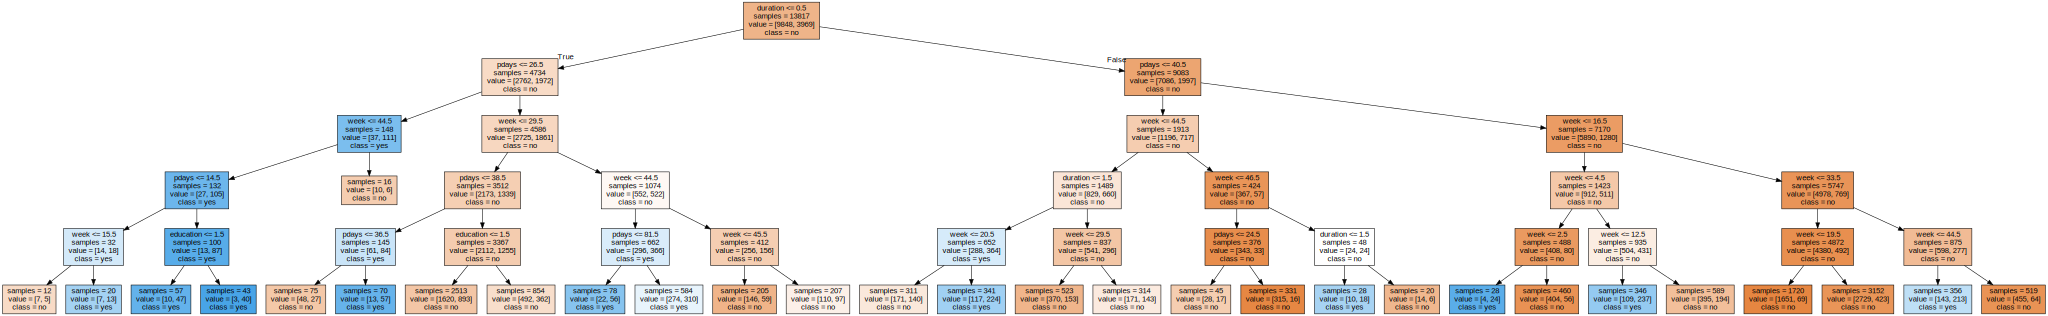

In [ ]:
export_graphviz(decision_tree_entropy, out_file="decision_tree_entropy.dot", class_names=["no", "yes"],
                feature_names=['week','job','pdays','duration','education','campaign'], impurity=False, filled=True)
with open("./decision_tree_entropy.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## **RANDOM FOREST CLASSIFIER**



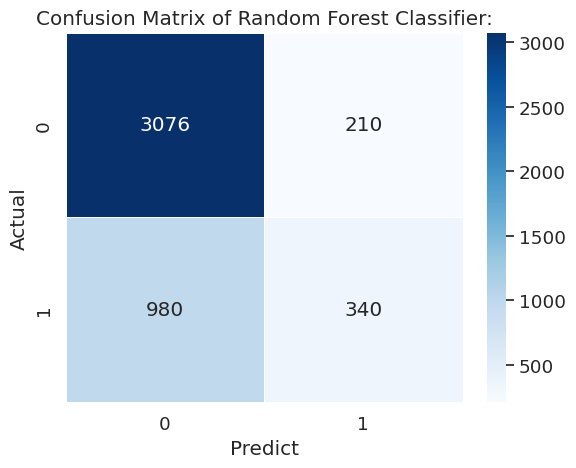

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      3286
           1       0.62      0.26      0.36      1320

    accuracy                           0.74      4606
   macro avg       0.69      0.60      0.60      4606
weighted avg       0.72      0.74      0.70      4606



In [ ]:

rfc = RandomForestClassifier(n_estimators=26,criterion='gini',max_depth=9,min_samples_leaf=17,random_state=42)
rfc.fit(x_train[['week','job','pdays','duration','education','campaign']],y_train)
rfcpred = rfc.predict(x_val[['week','job','pdays','duration','education','campaign']])

sns.heatmap(confusion_matrix(y_val,rfc.predict(x_val[['week','job','pdays','duration','education','campaign']])),  annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title("Confusion Matrix of Random Forest Classifier:")
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()
print(classification_report(y_val, rfc.predict(x_val[['week','job','pdays','duration','education','campaign']])))




### **1. Evaluation : ROC curve between Decision Tree and Random Forest Classifier of top 6 features**

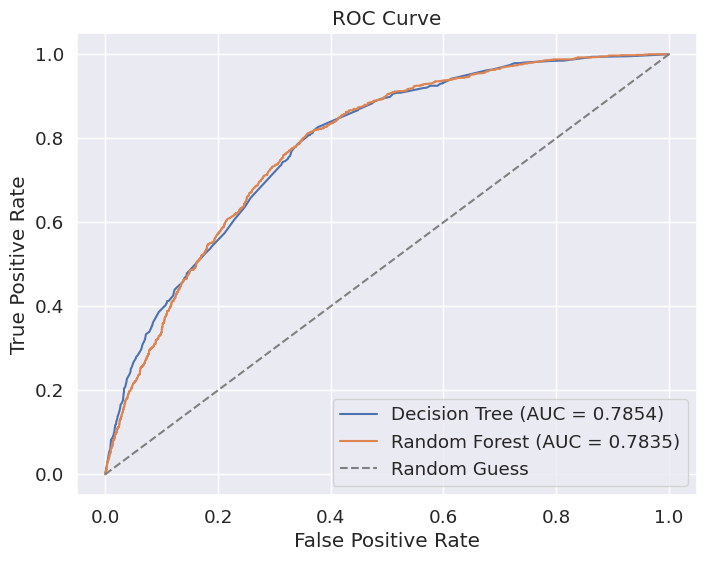

In [ ]:
decision_tree_gini=DecisionTreeClassifier(max_depth=9,min_samples_leaf=17,random_state=43)
decision_tree_gini.fit(x_train[['week','job','pdays','duration','education','campaign']],y_train)
rfc = RandomForestClassifier(n_estimators=26,criterion='gini',max_depth=9,min_samples_leaf=17,random_state=43)
rfc.fit(x_train[['week','job','pdays','duration','education','campaign']],y_train)
fpr_dt,tpr_dt,_ = roc_curve(y_val,decision_tree_gini.predict_proba(x_val[['week','job','pdays','duration','education','campaign']])[:, 1])
fpr_rf,tpr_rf,_ = roc_curve(y_val, rfc.predict_proba(x_val[['week','job','pdays','duration','education','campaign']])[:, 1])


# Calculate AUC (Area Under the Curve) scores
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

From the above ROC graph, we can come to the conclusion that the **Decision tree classifier** is a better model when compared to the performance of the Random Forest classifier which was built based on the 6 important features identified.